## INFORMATION ABOUT THE DATA SET

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)- symptoms- shortness of breathe, chest pain kind

ca: coronary artery anomaly (CAA), number of major vessels (0-3)-heart attack chances are more

cp : Chest Pain type chest pain type

Value 1: typical angina

Value 2: atypical angina

Value 3: non-anginal pain

Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

thalach : maximum heart rate achieved.

oldpeak : ST depression induced by exercise relative to rest.

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack ,1= more chance of heart attack

## OBJECTIVES

With the dataset provided for heart analysis, we have to analyse the possibilities of heart attack on the basis of various features, and then the prediction from the analysis will tell us that whether an individual is prone to heart attack or not.

QUESTIONS
1. What age group experience most heart attacks?
2. Which sex(1- male, 0- female) receive most heart attack? what is the ratio of male and female
3. Is there any relationship between exng and heart attack?
4. People who experienced heart attacks also had a fbs > 120? . What is the ratio of people with fbs >120 and people with fbs <120
5. trestbps (resting blood pressure) : Is there any relationship between resting bp and heart attack? 
6.  Is there any relationship between ca and heart attack?.Lesser vessels may lead to high chance of heart attack (need confirmation)
7. Does increase in cholestral level has relation with heart attack?

In [95]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [96]:
from math import*
from decimal import Decimal


In [97]:
data= pd.read_csv("heart.csv")
data.head(10) 

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


It gives information about the first 10 dataset present in the DataFrame- data

In [98]:
d= data.drop(labels=["output"], axis=1).values
d

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [99]:
#euclidean distance
eucl=np.zeros([np.size(d,0),np.size(d,0)])
for i in range(0,np.size(d,0)):
    for j in range(0,np.size(d,0)):
        eucl[i,j]= sqrt(sum(pow(a-b,2) for a, b in zip(d[i,:],d[j,:])))
        
eucl[3,4]

118.96654992055541

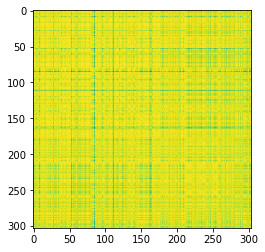

In [100]:
#cosine similarity
cosinesimilarity= np.zeros([np.size(d,0),np.size(d,0)])
for i in range(0,np.size(d,0)):
    for j in range(0, np.size(d,0)):
        numerator=sum(a*b for a,b in zip(d[i,:],d[j,:]))
        denominator=round(sqrt(sum([a*a for a in d[i,:]])),3)*round(sqrt(sum([a*a for a in d[j,:]])),3)
        cosinesimilarity[i,j]= round(numerator/float(denominator),3)
    
plt.imshow(cosinesimilarity,alpha=0.98)

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


The features we considered here has data type as integer with 64bits.

In [102]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## Observation
-> Mean age is 54 years and the minimum, maximum age is 29,77 years respectively.Hence,no children involved in this dataset.

-> The mean resting bp is 131 and its maximum value is 200.

-> The minimum and maximum heart rate achieved is 71, 202 respectively.

-> The average cholesterol level is 126 and the maximum value is 564 (this can be an outlier).

-> fasting blood sugar is categorical here as 0 indicates less than 120 range and consider less frequent heart attack.

In [103]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

As you can see here there is no null values in the data set.

### VISUALIZATION OF THE FEATURES

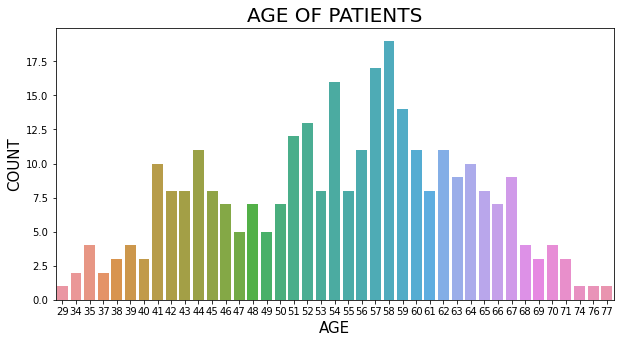

In [104]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['age'])
plt.title('AGE OF PATIENTS' , fontsize= 20)
plt.xlabel('AGE', fontsize= 15)
plt.ylabel('COUNT',fontsize= 15)
plt.show()

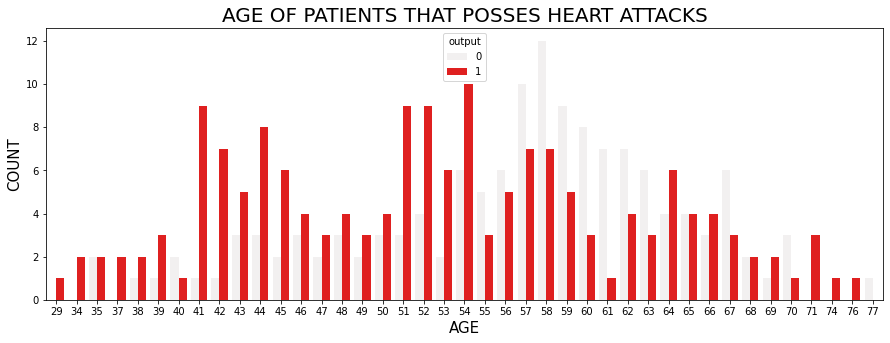

In [105]:
plt.figure(figsize=(15,5))
sns.countplot(x='age', data=data , hue='output' ,color='red')
plt.title('AGE OF PATIENTS THAT POSSES HEART ATTACKS' , fontsize= 20)
plt.xlabel('AGE', fontsize= 15)
plt.ylabel('COUNT',fontsize= 15)
plt.show()

The graph shows that the age group between (51-54) are more likely to have an heart attack.

<AxesSubplot:xlabel='output', ylabel='age'>

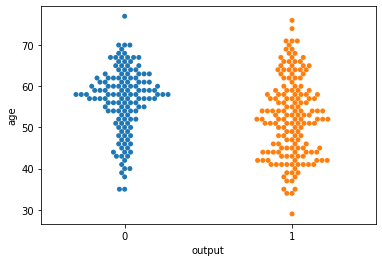

In [106]:
sns.swarmplot(x=data['output'],y=data['age'] )

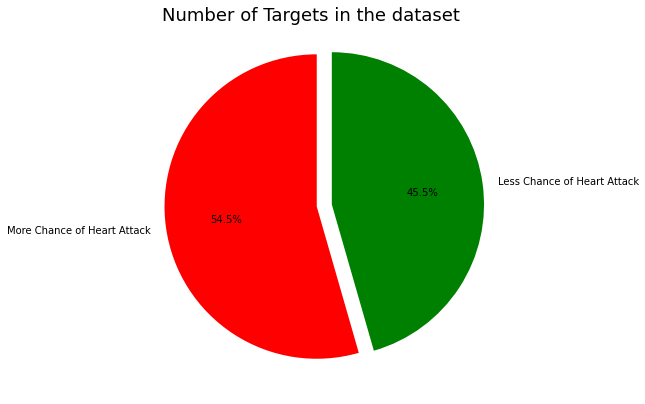

In [107]:
labels = ['More Chance of Heart Attack', 'Less Chance of Heart Attack']
sizes = data['output'].value_counts()

plt.figure(figsize=(7,7))
plt.suptitle("Number of Targets in the dataset",y=0.9, size=18,)
plt.pie(sizes, labels=labels,explode=[0,0.1], autopct='%0.1f%%', colors= ['red','green'],startangle=90)

plt.show()

<AxesSubplot:xlabel='sex', ylabel='count'>

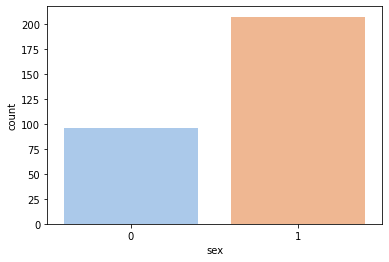

In [108]:
sns.countplot(data=data, x="sex", palette='pastel')

## Observation

1. The number of people belonging to sex category 0 are 96 whereas 1 are 206.
2. The number of people in one category are more than double than the other

In [109]:
s_out = data.groupby(['sex', 'output'])[['output']].count()
s_out

output
sex output        
0   0           24
    1           72
1   0          114
    1           93

Here I classified sex feature as Male(= 1) and Female(= 0) and trying to visualize the proningness of heart attack based upon gender parameter.

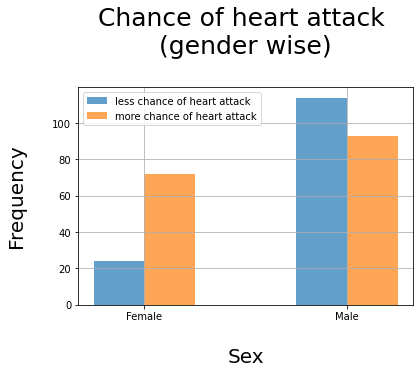

In [110]:
indx = np.arange(len(s_out.unstack().output.index))
width = 0.25


plt.bar(indx-width/2, s_out.unstack().output[0].values,
        width = width, alpha = 0.7, label = 'less chance of heart attack')
plt.bar(indx+width/2, s_out.unstack().output[1].values,
        width = width, alpha = 0.7, label = 'more chance of heart attack')

plt.title('Chance of heart attack \n(gender wise)\n', fontsize = 25)
plt.xlabel('\nSex', fontsize = 20)
plt.ylabel('Frequency\n', fontsize = 20)

plt.xticks([0,1], ['Female', 'Male'])
plt.legend()
plt.grid()
plt.show()

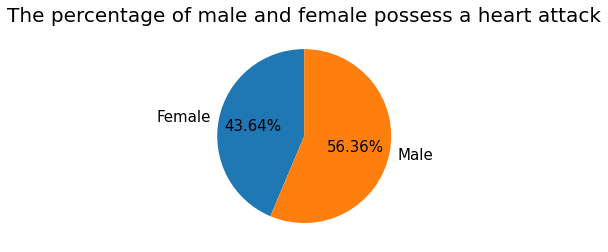

In [111]:
#percentage
f_m_hrt=data.groupby('sex')[['output']].sum()

plt.pie(f_m_hrt.output, labels = f_m_hrt.index.map({0: 'Female', 1: 'Male'}), textprops = {'fontsize': 15}, autopct = '%1.2f%%',startangle= 90)
plt.title('The percentage of male and female possess a heart attack', fontsize=20)
plt.show()

Male gender has more chance of heart attack compared to female ones.

In [112]:
f_m_hrt.output

sex
0    72
1    93
Name: output, dtype: int64

In [113]:
data.groupby(['sex'])[['output']].count()

,output
sex,
0,96
1,207


<AxesSubplot:xlabel='cp', ylabel='count'>

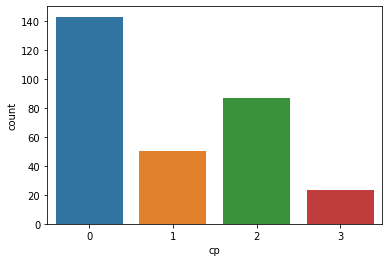

In [114]:
sns.countplot(x='cp', data=data )

## Observation

cp : Chest Pain type chest pain type number of people suffer is.

Value 0: typical angina   - 143

Value 1: atypical angina  - 50

Value 2: non-anginal pain - 87

Value 3: asymptomatic     - 23

People of chest pain category '0' have the highest count, whereas of count of chest pain '3' is the lowest

In [115]:
data.groupby('cp')[['output']].count()

,output
cp,
0,143
1,50
2,87
3,23


<AxesSubplot:xlabel='cp', ylabel='count'>

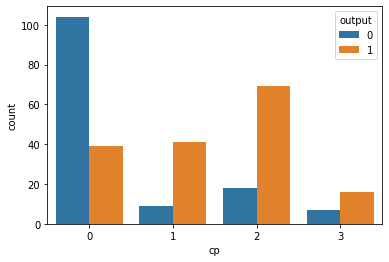

In [116]:
sns.countplot(x='cp', data=data ,hue='output' )

### Here is the Data of person prone to heart attack  by cp
cp : Chest Pain type chest pain type number of people suffer is.

Value 0: typical angina   - 39

Value 1: atypical angina  - 41

Value 2: non-anginal pain - 69

Value 3: asymptomatic     - 16

People of chest pain category causes heart attack '2' have the highest count, whereas of count of chest pain '3' is the lowest

In [117]:
data.groupby(['cp','output'])[['cp']].count()

cp
cp output     
0  0       104
   1        39
1  0         9
   1        41
2  0        18
   1        69
3  0         7
   1        16

<AxesSubplot:xlabel='fbs', ylabel='count'>

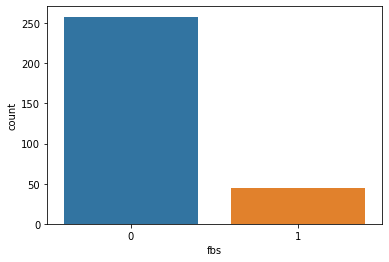

In [118]:
sns.countplot(x='fbs', data=data )

About 20% of the people have high fasting blood sugar i.e., more than 120mg/dl which leads to proning heart attack.

In [119]:
data['caa'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64

<AxesSubplot:xlabel='caa', ylabel='age'>

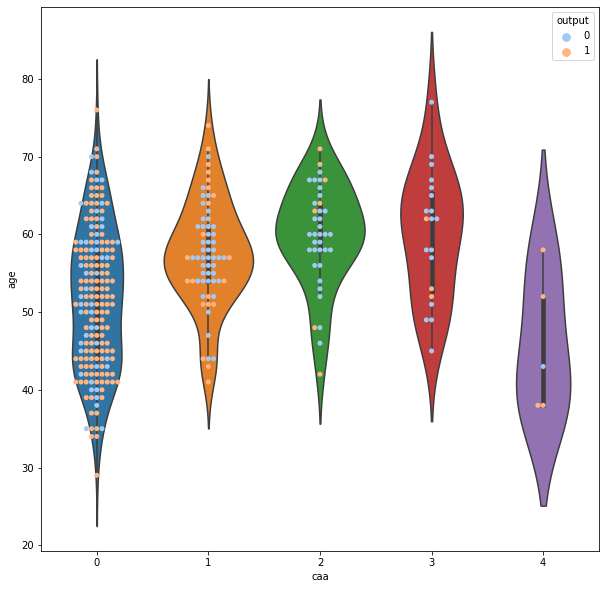

In [120]:
plt.figure(figsize = (10,10))
sns.violinplot(x='caa',y='age',data=data)
sns.swarmplot(x=data['caa'],y=data['age'],hue=data['output'], palette='pastel')

## Observations

->This swarmplot gives us a lot of information.

->According to the figure, people belonging to caa category '0' , irrespective of their age are highly prone to getting a heart attack.

->While there are very few people belonging to caa category '4' , but it seems that around 75% of those get heart attacks.
People belonging to category '1' , '2' and '3' are more or less at similar risk.

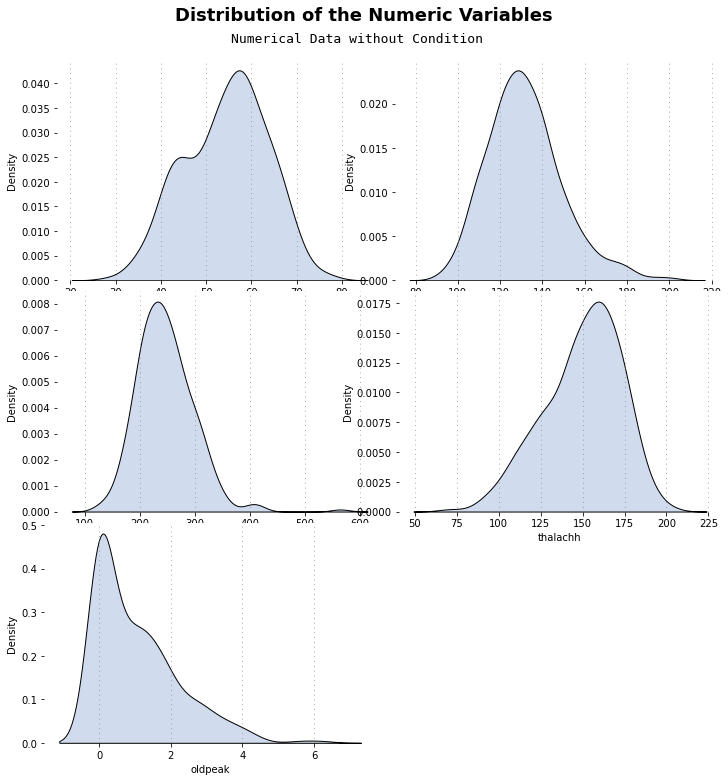

In [121]:
#Density study
data= pd.read_csv("heart.csv")
numerical = ['age','trtbps','chol','thalachh','oldpeak']

j=0
fig=plt.figure(figsize=(10,10),constrained_layout =True)
plt.suptitle("Distribution of the Numeric Variables",y=1.07, family='Sherif', size=18, weight='bold')
fig.text(0.315,1.02,"Numerical Data without Condition", size=13, fontweight='light', fontfamily='monospace')
for i in data[numerical]:
    ax=plt.subplot(321+j)
    ax.set_aspect('auto')
    ax.grid(color='gray', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
    ax=sns.kdeplot(data=data, x=i, color='#D0DBEE', fill=True, edgecolor='black', alpha=1)
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    j=j+1

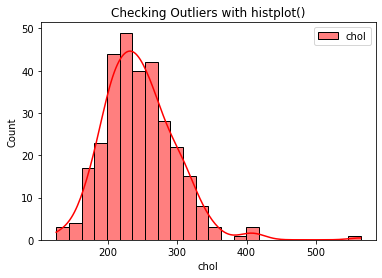

In [122]:
plt.title('Checking Outliers with histplot()')
sns.histplot(data.chol, label='chol', kde=True, color='red')
plt.legend()

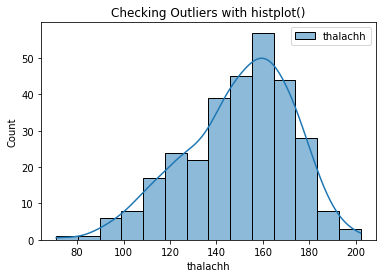

In [123]:
plt.title('Checking Outliers with histplot()')
sns.histplot(data['thalachh'],label='thalachh', kde=True )
plt.legend()

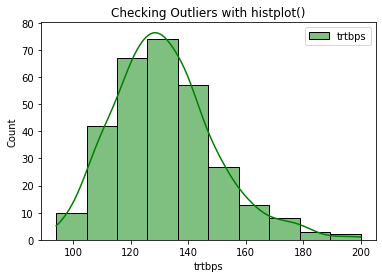

In [124]:
sns.color_palette("pastel")
plt.title('Checking Outliers with histplot()')
sns.histplot(data.trtbps, label='trtbps', kde=True, bins=10, color='green')
plt.legend()

# Observation
1- trtbps and chol looks like they are normally distributed, with some outliers highly skewed towards right.

2- In case of thalachh the data is highly skewed towards right.

In [125]:
#data_p=sns.pairplot(data,hue='output')
#data_p

 By the pair plot we can see data distribution of various features and also we can identfy outlier.

##  4)  fbs >120 

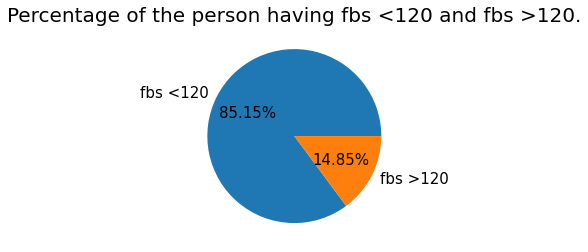

In [126]:
#percentage
fbs_exp=data.groupby('fbs')[['output']].count()

plt.pie(fbs_exp.output, labels = fbs_exp.index.map({0: 'fbs <120', 1: 'fbs >120'}), textprops = {'fontsize': 15}, autopct = '%1.2f%%')
plt.title('Percentage of the person having fbs <120 and fbs >120.', fontsize=20)
plt.show()

In [127]:
data.groupby('fbs')[['output']].count()

,output
fbs,
0,258
1,45


The number person having fbs <120 and fbs >120 are 258, 45 respectively.

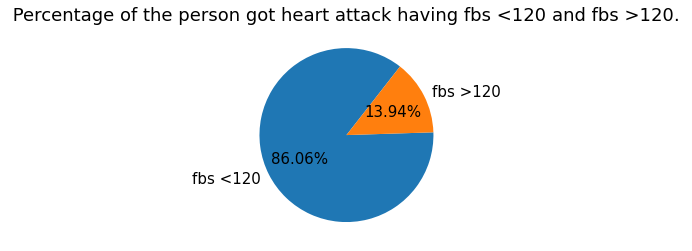

In [128]:
fbs_hrt=data.groupby(['fbs'])[['output']].sum()
plt.pie(fbs_hrt.output, labels = fbs_hrt.index.map({0: 'fbs <120', 1: 'fbs >120'}), textprops = {'fontsize': 15}, autopct = '%1.2f%%',startangle=52)
plt.title(' Percentage of the person got heart attack having fbs <120 and fbs >120. ', fontsize=18)
plt.show()

In [129]:
data.groupby(['fbs','output'])[['output']].count()

output
fbs output        
0   0          116
    1          142
1   0           22
    1           23

The number of person got heart attack having fbs <120 and fbs >120 are 142, 23 respectively.

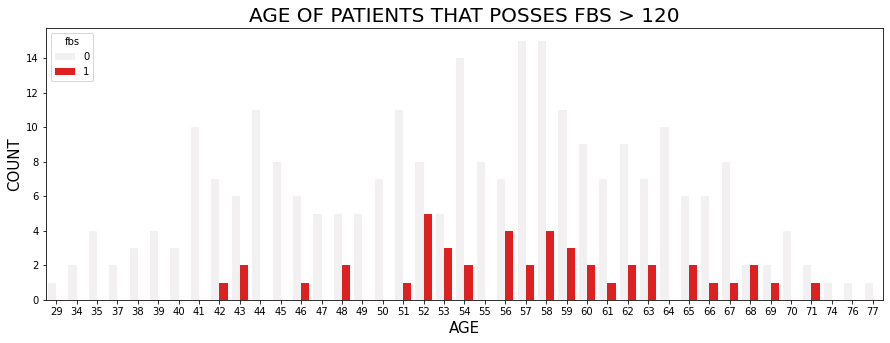

In [130]:
plt.figure(figsize=(15,5))
sns.countplot(x='age', data=data , hue='fbs' ,color='red')
plt.title('AGE OF PATIENTS THAT POSSES FBS > 120' , fontsize= 20)
plt.xlabel('AGE', fontsize= 15)
plt.ylabel('COUNT',fontsize= 15)
plt.show()

The fbs > 120 gernally occur after the age of 41(as showing in the above data). 

<AxesSubplot:xlabel='fbs', ylabel='age'>

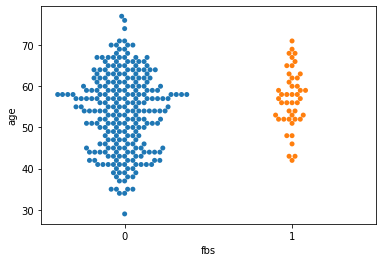

In [131]:
sns.swarmplot(x=data['fbs'],y=data['age'] )

##  5) trtbps 

In [132]:
trtbps_hrt=data.groupby(['output','trtbps'])[['output']].count()
trtbps_hrt

output
output trtbps        
0      100          2
       108          2
       110         11
       112          4
       114          1
...               ...
1      160          5
       170          1
       172          1
       178          1
       180          1

[77 rows x 1 columns]

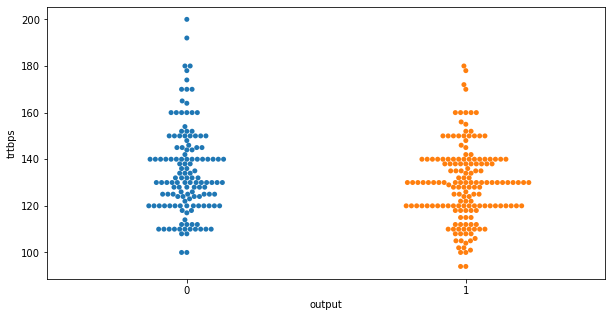

In [133]:
plt.figure(figsize=(10,5))
sns.swarmplot(x=data['output'],y=data['trtbps'])
plt.show()

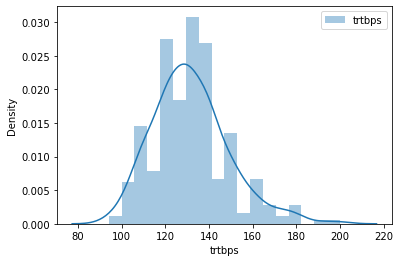

In [134]:
sns.distplot(data.trtbps, label='trtbps', kde=True)
plt.legend()

In [135]:
data.groupby(['exng','output'])[['output']].count()

output
exng output        
0    0           62
     1          142
1    0           76
     1           23

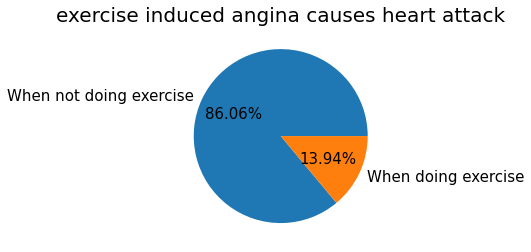

In [136]:
exng_hrt=data.groupby(['exng'])[['output']].sum()
plt.pie(exng_hrt.output, labels = exng_hrt.index.map({0: 'When not doing exercise', 1: 'When doing exercise'}), textprops = {'fontsize': 15}, autopct = '%1.2f%%')
plt.title('exercise induced angina causes heart attack',{'fontsize': 20})
plt.show()

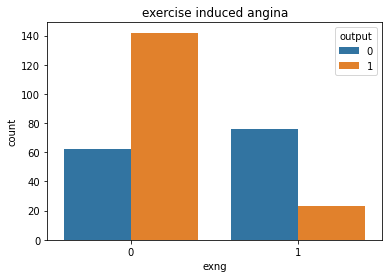

In [137]:
sns.countplot(x='exng', data=data ,hue='output' )
plt.title('exercise induced angina')
plt.show()

<AxesSubplot:xlabel='exng', ylabel='age'>

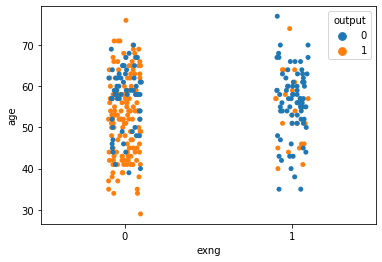

In [138]:
sns.stripplot(x=data['exng'],y=data['age'], hue= data['output'])

<AxesSubplot:>

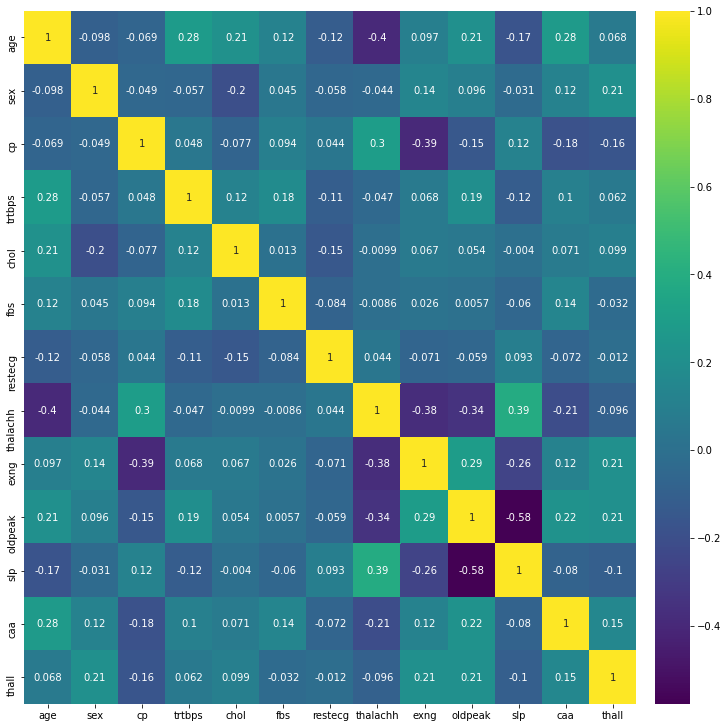

In [189]:
#correlation plot
out_drop= data.drop("output", axis= "columns")
plt.figure(figsize=(10,10),constrained_layout =True)
cor= out_drop.corr()
sns.heatmap(cor, annot= True, cmap= 'viridis')


## Skewness- Kurtosis

In [140]:
data_numerical = data[['age','trtbps','chol','thalachh', 'oldpeak']] 
skew_kurtosis=[]
for i in data_numerical.columns:
    skew_kurtosis.append([i,data_numerical[i].skew(),data_numerical[i].kurt()])
skew_kurt=pd.DataFrame(skew_kurtosis,columns=['Columns','Skewness','Kurtosis'])
skew_kurt

,Columns,Skewness,Kurtosis
0,age,-0.202463,-0.542167
1,trtbps,0.713768,0.929054
2,chol,1.143401,4.505423
3,thalachh,-0.537410,-0.061970
4,oldpeak,1.269720,1.575813


In [141]:
#x=(1,2)
#y=(1,2)
#x+y

## Observations
1) If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is symmetric.

1) Kurtosis is a measure of the combined sizes of the two tails. It measures the amount of probability in the tails. The value is often compared to the kurtosis of the normal distribution, which is equal to 3. If the kurtosis is greater than 3, then the dataset has heavier tails than a normal distribution . If the kurtosis is less than 3, then the dataset has lighter tails than a normal distribution.

## Outlier Detection

The boxplot shows features like chol,trtbps have outliers.

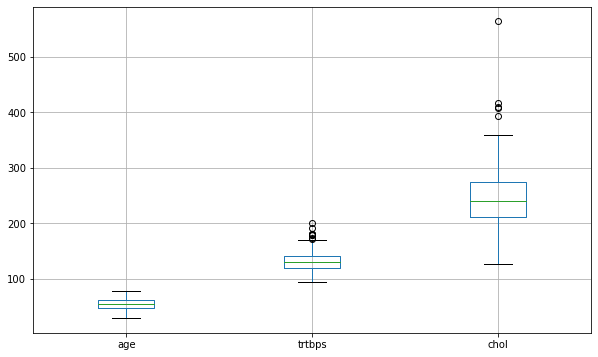

In [142]:
fig, axis= plt.subplots(figsize=(10,6) )
data[['age', 'trtbps', 'chol']].boxplot(ax=axis)
plt.show()

<AxesSubplot:xlabel='fbs', ylabel='age'>

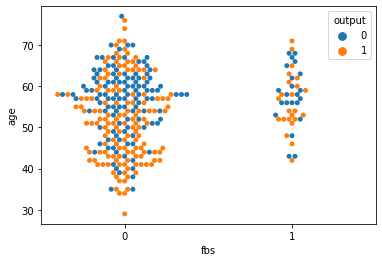

In [143]:
sns.swarmplot(x=data['fbs'],y=data['age'], hue= data['output'])

## Prediction

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [145]:
df1 = data

# define the columns to be encoded and scaled
cat_cols = ['sex','exng','caa','cp','fbs','restecg','thall','slp']
num_cols = ["age","trtbps","chol",'thalachh', 'oldpeak']


In [146]:
# encoding the categorical columns
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# defining the features and target
X = df1.drop(['output'],axis=1)
y = df1[['output']]

In [147]:
df1

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,exng_1,caa_1,caa_2,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,thall_1,thall_2,thall_3,slp_1,slp_2
0,63,145,233,150,2.3,1,1,0,0,0,...,0,1,1,0,0,1,0,0,0,0
1,37,130,250,187,3.5,1,1,0,0,0,...,1,0,0,1,0,0,1,0,0,0
2,41,130,204,172,1.4,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,56,120,236,178,0.8,1,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
4,57,120,354,163,0.6,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0,1,0,0,...,0,0,0,1,0,0,0,1,1,0
299,45,110,264,132,1.2,0,1,0,0,0,...,0,1,0,1,0,0,0,1,1,0
300,68,144,193,141,3.4,0,1,0,0,1,...,0,0,1,1,0,0,0,1,1,0
301,57,130,131,115,1.2,0,1,1,1,0,...,0,0,0,1,0,0,0,1,1,0


In [148]:
# instantiating the scaler
scaler = StandardScaler()

In [149]:
# scaling the continuous features
X[num_cols] = scaler.fit_transform(X[num_cols])
print("The first 5 rows of X are")
X

The first 5 rows of X are


,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,thall_1,thall_2,thall_3,slp_1,slp_2
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,1,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,1,0,0,1,0,...,0,0,1,1,0,0,0,1,1,0
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,1,1,1,0,0,...,0,0,0,1,0,0,0,1,1,0


In [150]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,5.825923e-17,1.001654,-2.797624,-0.757280,0.069886,0.731619,2.496240
trtbps,303.0,-7.146832e-16,1.001654,-2.148802,-0.663867,-0.092738,0.478391,3.905165
chol,303.0,-9.828955e-17,1.001654,-2.324160,-0.681494,-0.121055,0.545674,6.140401
thalachh,303.0,-5.203025e-16,1.001654,-3.439267,-0.706111,0.146634,0.715131,2.289429
oldpeak,303.0,-3.140136e-16,1.001654,-0.896862,-0.896862,-0.206705,0.483451,4.451851
sex_1,303.0,6.831683e-01,0.466011,0.000000,0.000000,1.000000,1.000000,1.000000
exng_1,303.0,3.267327e-01,0.469794,0.000000,0.000000,0.000000,1.000000,1.000000
caa_1,303.0,2.145215e-01,0.411169,0.000000,0.000000,0.000000,0.000000,1.000000
caa_2,303.0,1.254125e-01,0.331734,0.000000,0.000000,0.000000,0.000000,1.000000
caa_3,303.0,6.600660e-02,0.248704,0.000000,0.000000,0.000000,0.000000,1.000000


In [151]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=10)

In [152]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 22), (61, 22), (242, 1), (61, 1))

In [153]:
X_train.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,thall_1,thall_2,thall_3,slp_1,slp_2
286,0.511041,0.135714,-0.816773,0.540209,-0.206705,1,0,0,1,0,...,0,1,0,1,0,0,1,0,0,1
102,0.952197,0.478391,-0.990702,1.283627,-0.896862,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
242,1.062485,0.763956,-0.662169,-0.771706,0.828529,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
65,-2.135891,0.364165,-1.222608,1.414819,0.310912,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
35,-0.922713,0.592617,-1.338561,0.452748,0.310912,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [154]:
X_test.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,thall_1,thall_2,thall_3,slp_1,slp_2
246,0.180175,0.135714,3.144951,0.015443,0.742260,0,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0
183,0.400752,-1.120770,-0.314310,0.671400,1.259877,1,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0
229,1.062485,-0.378302,1.212403,-0.815437,0.655990,1,1,0,0,0,...,1,0,0,1,0,0,0,1,1,0
126,-0.812425,-1.120770,-0.816773,-0.290671,-0.810592,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
184,-0.481558,1.049520,-0.063079,-0.946628,1.346147,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [155]:
y_test.head()

,output
246,0
183,0
229,0
126,1
184,0


In [156]:
model = LogisticRegression()

# fitting the objects in the model
model.fit(X_train, y_train)

LogisticRegression()

In [157]:
y_predicted= model.predict(X_test)
y_predicted

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [158]:
model_train_score = model.score(X_train, y_train)
model_test_score = accuracy_score(y_test, y_predicted)
print(model_test_score)

0.8524590163934426


In [159]:
# calculating the probabilities
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[0.97025246, 0.02974754],
       [0.70612393, 0.29387607],
       [0.72427083, 0.27572917],
       [0.15528064, 0.84471936],
       [0.90964752, 0.09035248],
       [0.11452722, 0.88547278],
       [0.27785181, 0.72214819],
       [0.22954937, 0.77045063],
       [0.09198273, 0.90801727],
       [0.89830955, 0.10169045],
       [0.03005065, 0.96994935],
       [0.88032602, 0.11967398],
       [0.23040583, 0.76959417],
       [0.02495503, 0.97504497],
       [0.91939108, 0.08060892],
       [0.030578  , 0.969422  ],
       [0.95799695, 0.04200305],
       [0.99164148, 0.00835852],
       [0.25855053, 0.74144947],
       [0.80403498, 0.19596502],
       [0.98146071, 0.01853929],
       [0.0742143 , 0.9257857 ],
       [0.38331935, 0.61668065],
       [0.04059563, 0.95940437],
       [0.87786374, 0.12213626],
       [0.97461481, 0.02538519],
       [0.99345082, 0.00654918],
       [0.91833804, 0.08166196],
       [0.06747198, 0.93252802],
       [0.97343802, 0.02656198],
       [0.

Text(24.0, 0.5, 'True Value')

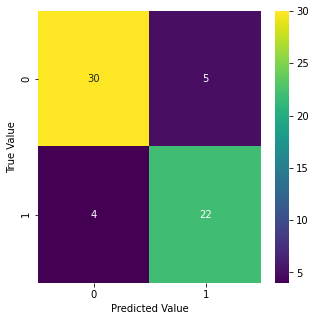

In [160]:
cm= confusion_matrix(y_test, y_predicted)
#visualize
plt.figure(figsize= (5,5))
sns.heatmap(cm, annot= True, cmap= 'viridis')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

In [161]:
from sklearn.tree import DecisionTreeClassifier

d_classif = DecisionTreeClassifier(random_state=10).fit(X_train,y_train)
d_classif

DecisionTreeClassifier(random_state=10)

In [162]:
y_pred= d_classif.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

In [163]:
y_test.transpose()

,246,183,229,126,184,1,59,194,132,175,...,87,244,213,36,10,277,121,187,301,283
output,0,0,0,1,0,1,1,0,1,0,...,1,0,0,1,1,0,1,0,0,0


In [164]:
model_test_score1 = accuracy_score(y_test, y_pred)
print(model_test_score1)

0.7377049180327869


Text(24.0, 0.5, 'True Value')

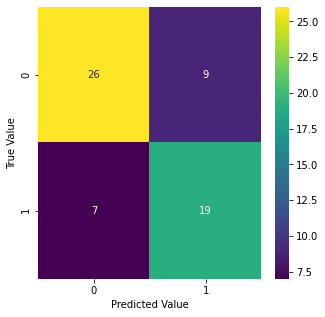

In [165]:
cm= confusion_matrix(y_test, y_pred)
#visualize
plt.figure(figsize= (5,5))
sns.heatmap(cm, annot= True, cmap= 'viridis')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

In [166]:
#PCA
from sklearn.decomposition import PCA

In [167]:
pca= PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [168]:
x_pca=pca.transform(X)
x_pca.shape #The features are reduced to 2

(303, 2)

In [169]:
X.shape

(303, 22)

In [170]:
x_pca

array([[-1.27534023,  0.17552067],
       [ 0.98192127, -0.45445361],
       [ 1.62342999, -0.32166684],
       [ 1.35111236,  0.28872797],
       [ 0.41895626,  1.60480407],
       [-0.03355608, -0.51558658],
       [-0.41517656,  0.98824125],
       [ 1.81694848,  0.17683236],
       [ 0.23369932,  0.77724675],
       [ 0.58382739,  0.03296579],
       [ 0.45314936,  0.39921282],
       [ 0.83551815,  0.45994799],
       [ 1.36946309,  0.65943111],
       [-0.67166261, -1.12103867],
       [-0.07071467,  1.66799067],
       [ 0.56307558, -0.74198657],
       [ 1.0629854 ,  1.8565504 ],
       [-2.11005319, -0.14717275],
       [ 0.95153399,  0.53887631],
       [-0.83965495,  0.74058202],
       [-0.06314168,  0.06326381],
       [ 1.85405006,  0.16013203],
       [ 2.02771434,  0.41241526],
       [-1.00168419,  0.33241534],
       [ 1.21273931, -0.55932859],
       [-0.59366777,  2.63936353],
       [-0.07940507,  0.42365697],
       [ 0.84690001, -1.70552776],
       [-0.7422266 ,

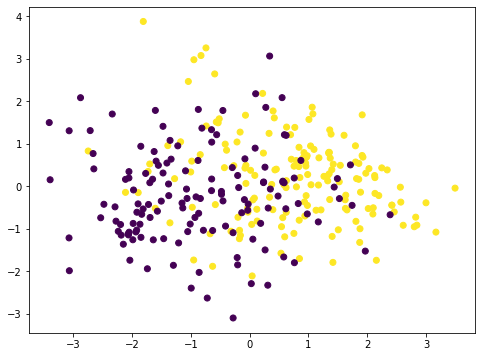

In [171]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1],c= data['output'])

In [172]:
#pca using algorithm
components=6


In [173]:
meaniris= np.mean(d, axis=0)
meaniris

array([5.43663366e+01, 6.83168317e-01, 9.66996700e-01, 1.31623762e+02,
       2.46264026e+02, 1.48514851e-01, 5.28052805e-01, 1.49646865e+02,
       3.26732673e-01, 1.03960396e+00, 1.39933993e+00, 7.29372937e-01,
       2.31353135e+00])

In [174]:
cov_data= np.cov(d-meaniris, rowvar= False)
cov_data

array([[ 8.24845584e+01, -4.16661203e-01, -6.43498787e-01,
         4.44959019e+01,  1.00585076e+02,  3.92433283e-01,
        -5.55012786e-01, -8.29033178e+01,  4.13022097e-01,
         2.21458265e+00, -9.44790506e-01,  2.56635630e+00,
         3.78139138e-01],
       [-4.16661203e-01,  2.17166087e-01, -2.37361484e-02,
        -4.63969576e-01, -4.78030949e+00,  7.47491968e-03,
        -1.42613599e-02, -4.69870828e-01,  3.10143597e-02,
         5.19933119e-02, -8.81909383e-03,  5.63569602e-02,
         5.99304964e-02],
       [-6.43498787e-01, -2.37361484e-02,  1.06513234e+00,
         8.61713986e-01, -4.11377396e+00,  3.47190348e-02,
         2.41077088e-02,  6.99161804e+00, -1.91167792e-01,
        -1.78821061e-01,  7.61370839e-02, -1.91080366e-01,
        -1.02200949e-01],
       [ 4.44959019e+01, -4.63969576e-01,  8.61713986e-01,
         3.07586453e+02,  1.11967215e+02,  1.10904203e+00,
        -1.05232444e+00, -1.87591305e+01,  5.57111009e-01,
         3.93448626e+00, -1.31283195e

In [175]:
eig_val, eig_vect= np.linalg.eig(cov_data)
eig_vect= eig_vect.transpose()


In [176]:
eig_val.sum()

3606.1990120866362

In [177]:
eig_val, eig_vect

(array([2.69586528e+03, 5.42264942e+02, 3.05073066e+02, 5.84779802e+01,
        1.38508932e+00, 1.01418660e+00, 8.25795710e-01, 3.60017094e-01,
        1.13275430e-01, 2.78450175e-01, 1.47738670e-01, 1.81365780e-01,
        2.11828958e-01]),
 array([[ 3.94611190e-02, -1.78278639e-03, -1.53716667e-03,
          4.75880705e-02,  9.98053283e-01,  1.16389852e-04,
         -1.55243101e-03, -7.35838010e-03,  6.31483108e-04,
          1.32988432e-03, -9.99857233e-05,  1.46773705e-03,
          1.18215354e-03],
        [ 1.82186255e-01,  7.93727347e-04, -1.25419057e-02,
          1.03810033e-01, -1.94250905e-02,  4.61971663e-04,
         -1.20213285e-03, -9.77188942e-01,  7.54817512e-03,
          1.79407185e-02, -1.04271838e-02,  1.01095919e-02,
          2.59241726e-03],
        [-1.25504851e-01,  1.06523049e-03, -6.16323248e-03,
         -9.82278058e-01,  5.08647357e-02, -3.66506652e-03,
          2.70960599e-03, -1.28926064e-01,  2.85338412e-05,
         -9.21430005e-03,  2.30213080e-03, -

In [178]:
sorted_components= np.argsort(eig_val,axis=0)[::-1]
sorted_components

array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 12, 11, 10,  8], dtype=int64)

In [179]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [180]:
y= (eig_vect[:,0].transpose())*eig_vect[:, 0]
y

array([1.55717991e-03, 3.31918315e-02, 1.57514677e-02, 9.48765409e-01,
       8.88715870e-05, 1.27731667e-05, 5.55590977e-04, 1.71191180e-05,
       1.15105093e-05, 1.39238092e-06, 1.36730162e-07, 4.66708065e-05,
       4.63599834e-08])

In [181]:
sum(y)

1.0000000000000002

In [182]:
sorted_components[:components]


array([0, 1, 2, 3, 4, 5], dtype=int64)

In [183]:
projection_matrix= eig_vect[sorted_components[:components]]
projection_matrix

array([[ 3.94611190e-02, -1.78278639e-03, -1.53716667e-03,
         4.75880705e-02,  9.98053283e-01,  1.16389852e-04,
        -1.55243101e-03, -7.35838010e-03,  6.31483108e-04,
         1.32988432e-03, -9.99857233e-05,  1.46773705e-03,
         1.18215354e-03],
       [ 1.82186255e-01,  7.93727347e-04, -1.25419057e-02,
         1.03810033e-01, -1.94250905e-02,  4.61971663e-04,
        -1.20213285e-03, -9.77188942e-01,  7.54817512e-03,
         1.79407185e-02, -1.04271838e-02,  1.01095919e-02,
         2.59241726e-03],
       [-1.25504851e-01,  1.06523049e-03, -6.16323248e-03,
        -9.82278058e-01,  5.08647357e-02, -3.66506652e-03,
         2.70960599e-03, -1.28926064e-01,  2.85338412e-05,
        -9.21430005e-03,  2.30213080e-03, -4.19733045e-03,
        -1.21740467e-03],
       [-9.74045897e-01,  4.63454359e-03, -9.26243002e-03,
         1.48034489e-01,  3.02510768e-02, -3.43436410e-03,
         2.95854666e-03, -1.66483567e-01,  7.02397370e-03,
         8.03485794e-04, -3.22289926e

In [184]:
explained_variance= eig_val[sorted_components]
explained_variance

array([2.69586528e+03, 5.42264942e+02, 3.05073066e+02, 5.84779802e+01,
       1.38508932e+00, 1.01418660e+00, 8.25795710e-01, 3.60017094e-01,
       2.78450175e-01, 2.11828958e-01, 1.81365780e-01, 1.47738670e-01,
       1.13275430e-01])

In [185]:
explained_variance_ration= explained_variance / eig_val.sum()
explained_variance_ration

array([7.47564199e-01, 1.50370221e-01, 8.45968470e-02, 1.62159604e-02,
       3.84085658e-04, 2.81234229e-04, 2.28993383e-04, 9.98328415e-05,
       7.72143117e-05, 5.87402295e-05, 5.02927817e-05, 4.09679747e-05,
       3.14113086e-05])

In [186]:
eig_val

array([2.69586528e+03, 5.42264942e+02, 3.05073066e+02, 5.84779802e+01,
       1.38508932e+00, 1.01418660e+00, 8.25795710e-01, 3.60017094e-01,
       1.13275430e-01, 2.78450175e-01, 1.47738670e-01, 1.81365780e-01,
       2.11828958e-01])

In [187]:
transformed_data= np.dot(d-meaniris, projection_matrix.transpose())
transformed_data.shape

(303, 6)

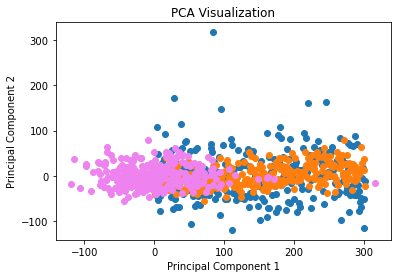

In [188]:
#visualization
plt.figure()
plt.title("PCA Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.scatter(range(303),transformed_data[:, 0])
plt.scatter(range(303),transformed_data[:, 1])
plt.scatter(x= transformed_data[:,0], y= transformed_data[:, 1], color= "violet")